## Short Introduction to Plots.jl

## Idea

Plots.jl is a non-traditional plotting library

- It does not implement a "plotting backend" itself, it's a plotting API
- The API is easily extendable via recipes

### Documentation

The rapidly growing documentation is at [http://docs.juliaplots.org/latest/](http://docs.juliaplots.org/latest/)


## Backends

Plots.jl uses other plotting libraries as backends

- PyPlot (matplotlib): Slow but dependable. Matplotlib is a very mature product. However it can be hard to install it at times.
- GR: Feature-rich and fast, new, easy to install. Default option.
- Plotly/PlotlyJS: Interactive and good for web
- PGFPlots: Native LaTeX rendering
- UnicodePlots: Plots to unicode for no-display situations

* Each of those is a separate plotting package, with a separate API. Each has their strengths and weaknesses. However, you'd have to learn 5 API's to use them all. Plots.jl reduces that to 1 API. 
* If there is some fine grained functionality that doesn't work with Plots, you could always use the respective plotting package directly.


We will mostly rely on the default option, which is `GR`. More [about Backends](http://docs.juliaplots.org/latest/backends/).

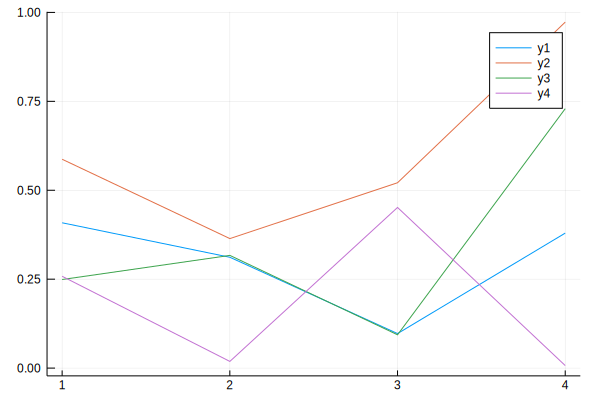

In [1]:
using Plots
plot(rand(4,4))  # will use the default backend: GR

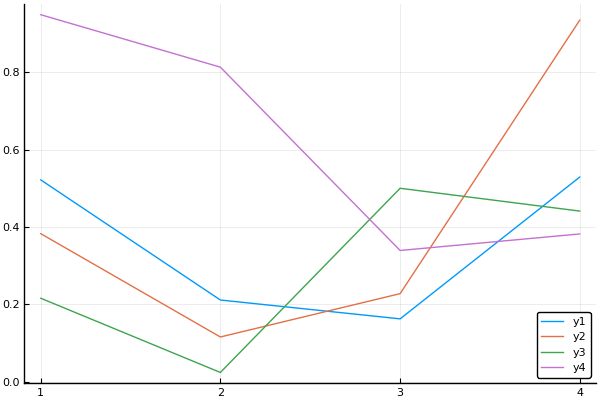

In [2]:
pyplot()  # change backend to pyplot
plot(rand(4,4))

In [3]:
# plotlyjs.jl is currently having an unresolved bug for notebooks.
# this stuff only works in the terminal.
# https://github.com/sglyon/PlotlyJS.jl/issues/255
# plotlyjs() # change backend
# plot(rand(4,4))

* The PGFPlots backend can emit native `.tex` code. 
* It's just plain beautiful.

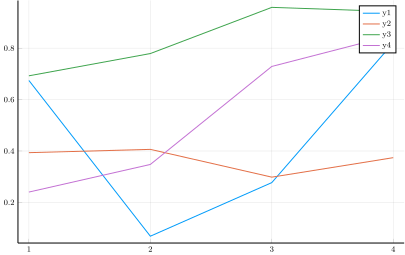

In [4]:
pgfplots()
plot(rand(4,4))  
# not in notebook!
# using PGFPlots
# x = [1,2,3]
# y = [2,4,1]
# PGFPlots.plot(x, y)

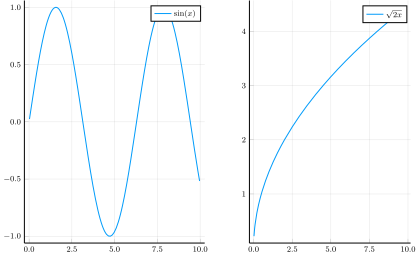

In [5]:
using LaTeXStrings
plot([plot(sin,0,10,label=L"$\sin(x)$"),plot(x->sqrt(2x),0,10,label=L"$\sqrt{2x}$")]...)

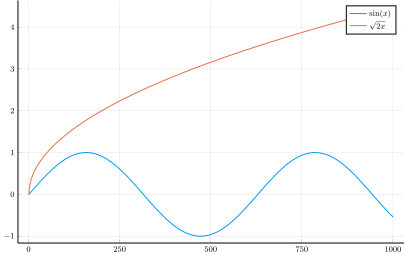

In [6]:
dd = vcat([[sin(i)  sqrt(2i)] for i in 0:0.01:10]...);
p = plot(dd,label=[L"$\sin(x)$",L"$\sqrt{2x}$"]) 

In [7]:
# save this as:
# savefig("myfile.tex")
# savefig("myfile.pdf")
# savefig("myfile.svg")

## Attributes

The attributes work with each of the backends: http://docs.juliaplots.org/latest/attributes/

Compatibility of attributes is found in this chart: http://docs.juliaplots.org/latest/supported/

I find it easiest to use this page to find the right attributes: http://docs.juliaplots.org/latest/examples/pyplot/

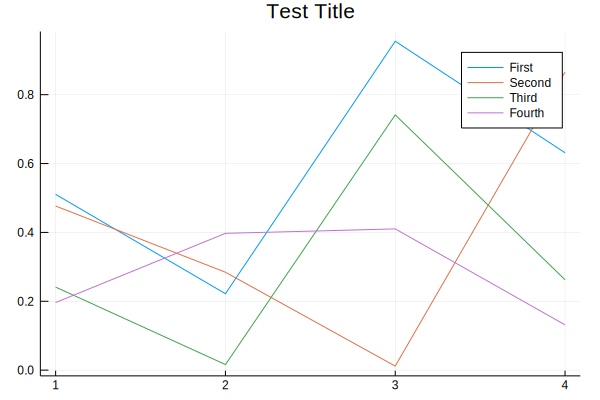

In [8]:
gr()  # back to GR
plot(rand(4,4),title="Test Title",label=["First" "Second" "Third" "Fourth"])

## Some Example useage

Let's try this out. Most of those examples come from [the examples section](http://docs.juliaplots.org/latest/examples/pyplot) of the plots website, so check it out for more.

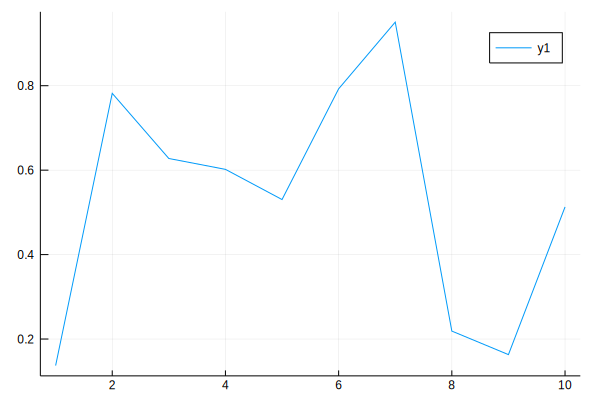

In [9]:
# lesson 1: every column is a series
plot(rand(10))  # 1 col = 1 series

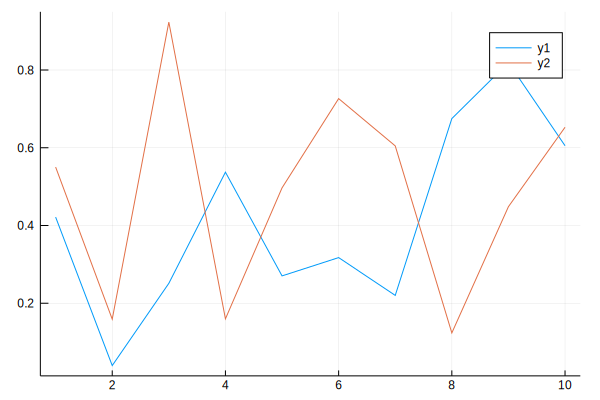

In [10]:
plot(rand(10,2))  # 2 cols = ...

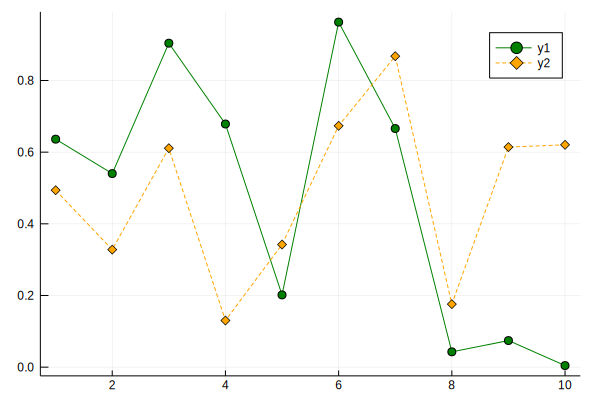

In [11]:
# different linetypes
plot(rand(10,2),line=(:dot,:auto),marker=([:circle :diamond]),color=[:green :orange])

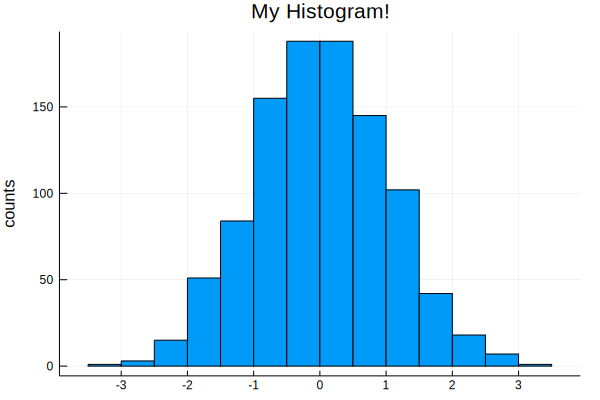

In [12]:
# histogram
histogram(randn(1000),nbins=20,legend=false,title="My Histogram!",ylabel="counts")

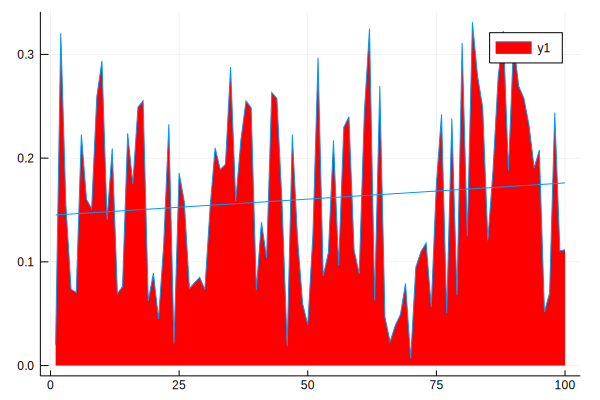

In [13]:
# add to an existing plot later...
plot(rand(100) / 3,reg=true,fill=(0,:red))

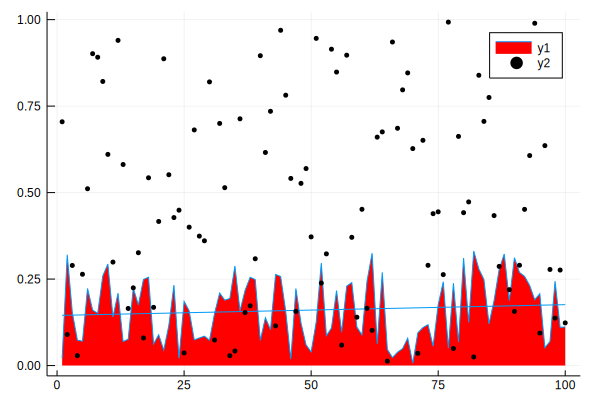

In [14]:
# ... with plot! or scatter!
scatter!(rand(100),marker=(2,:circle),color=:black)

## Subplots

* We often want to build subplots, ie multiple plots in one figure.
* Plots.jl has a convenient `layout` argument that you can specify.


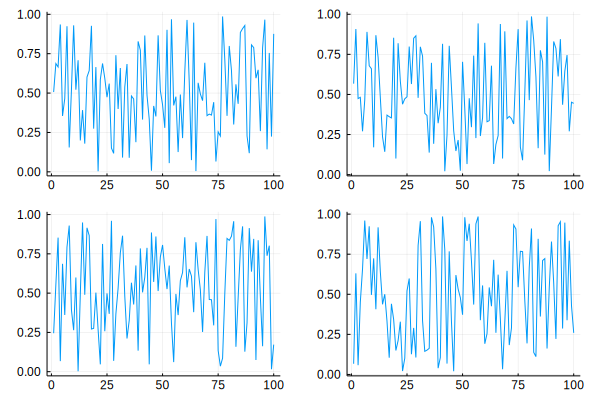

In [15]:
plot(rand(100,4),layout = 4,legend=false)  # make 4 equal sized subplots

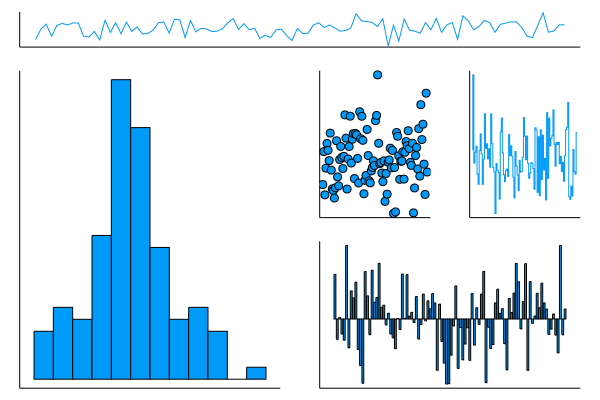

In [16]:
# specify the size of subplots
l = @layout([a{0.1h};b [c d; e]])
plot(randn(100,5),layout=l,t=[:line :histogram :scatter :steppre :bar],leg=false,ticks=nothing,border=false)

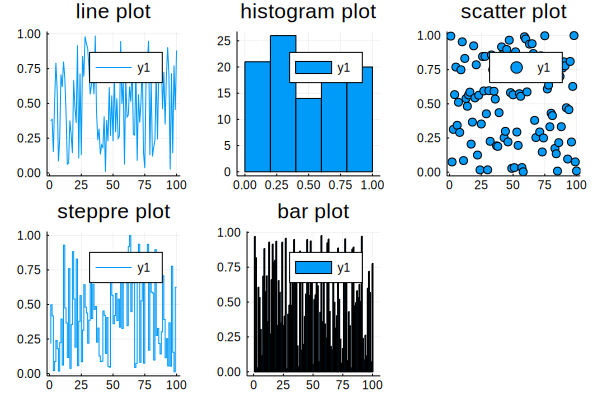

In [17]:
# we can also sequentially build plots and then stack them together
ty = [:line :histogram :scatter :steppre :bar]
p = Any[]
for typ in ty
    push!(p,plot(rand(100),t=typ,title="$typ plot"))
end
plot(p...)

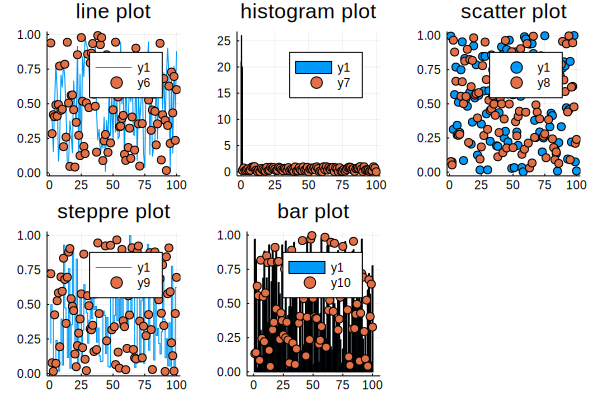

In [18]:
# ... and we can also add to the subplots in the same way
plot!(rand(100,5),t=:scatter)

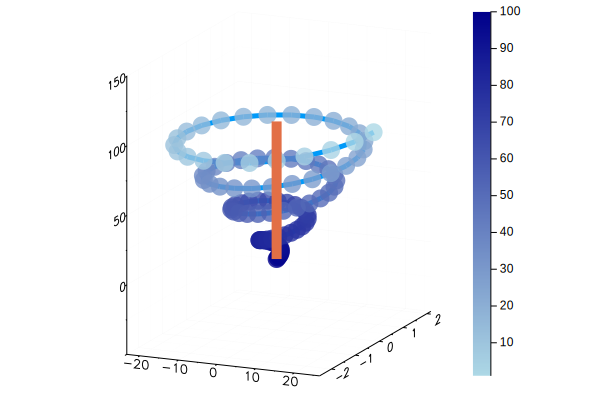

In [19]:
# 3D plots
n = 100
ts = range(0,stop = 8π, length = n)
x = ts .* map(cos,ts)
y = (0.1ts) .* map(sin,ts)
z = 1:n
plot(x,y,z,zcolor=reverse(z),m=(10,0.8,:blues,stroke(0)),leg=false,cbar=true,w=5)
plot!(zeros(n),zeros(n),1:n,w=10)

In [20]:
# plotlyjs is hard to beat for 3D
# unfortunately...
# plotlyjs()
# plot(x,y,z,zcolor=reverse(z),m=(10,0.8,:blues,stroke(0)),leg=false,cbar=true,w=5)
# plot!(zeros(n),zeros(n),1:n,w=10)

## Animations

Any plot can be animated: see [https://juliaplots.github.io](https://juliaplots.github.io)

## Recipes

Recipes are abstract instructions for how to "build a plot" from data. There are multiple kinds of recipes. In execution order:

- User Recipes: Provides dispatches to plotting
- Type Recipes: Says how to interpret the data of an abstract type
- Plot Recipes: A pre-processing recipe which builds a set of series plots and defaults
- Series Recipes: What most would think of as a "type of plot", i.e. scatter, histogram, etc.

Since these extend Plots.jl itself, all of Plots.jl is accessible from the plotting commands that these make, and these recipes are accessible from each other.

[Series recipes are used to extend the compatibility of backends itself!]

[Check out of the Plots Ecosystem!](https://juliaplots.github.io/ecosystem/)

## Type Recipe Example

* Plots.jl allows you to define type-specific plots
* For example, here we visualize a solution obtained from `DifferentialEquations.jl` by just calling `plot(sol)`
    * This is a very powerful package by the way, so you should have a look at the excellent documentation.
* This is a very convenient feature to plot your custom types.

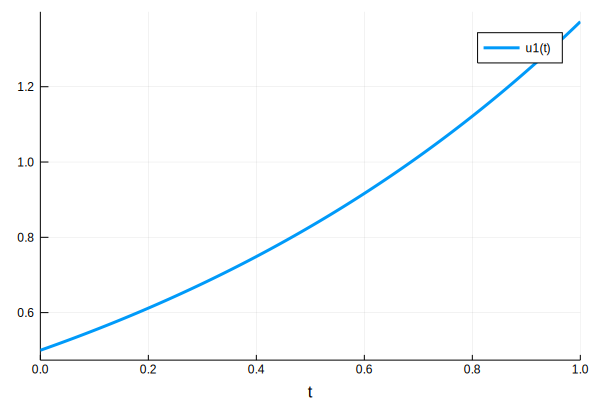

In [21]:
# this is from http://docs.juliadiffeq.org/latest/tutorials/ode_example.html
using DifferentialEquations
f(u,p,t) = 1.01*u
u0=1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)
gr()  # switch backend again
plot(sol) 

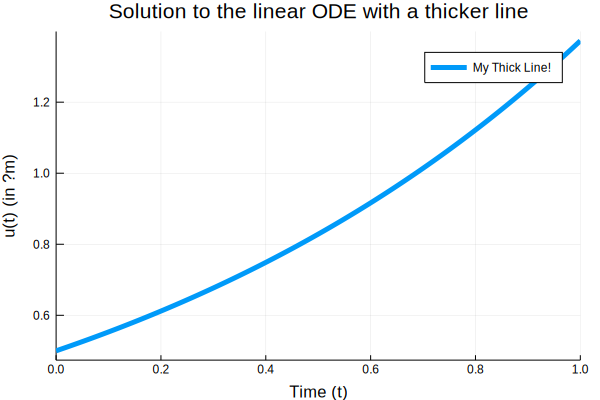

In [22]:
# the plot function still accepts keywords to set attributes:
plot(sol,linewidth=5,title="Solution to the linear ODE with a thicker line",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!") 

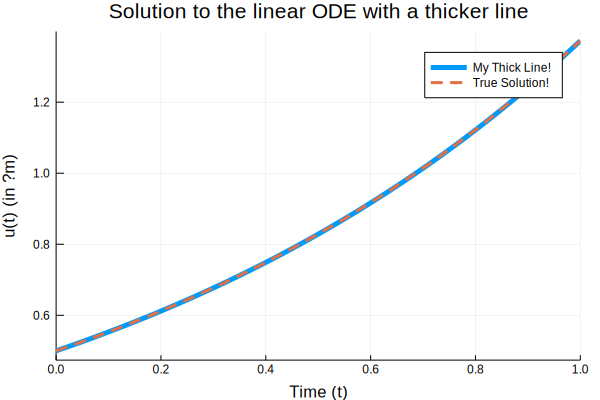

In [23]:
# and we can add to the plot with plot!
plot!(sol.t, t->0.5*exp(1.01t),lw=3,ls=:dash,label="True Solution!")

## MomentOpt.jl

* Show the `plot` methods at [MomentOpt.jl](https://github.com/floswald/MomentOpt.jl)


## Plot and Type Recipes Together

* StatPlots.jl is a package based on Plots.jl to produce statistical plots
* It has dataframe support via the `@df` macro
* Let's check it out.

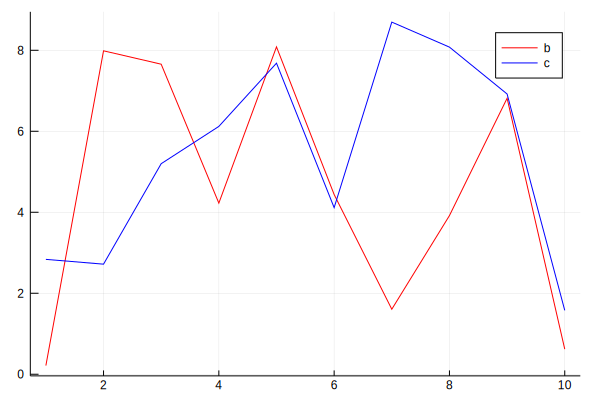

In [24]:
# basic example
using DataFrames, StatPlots
df = DataFrame(a = 1:10, b = 10*rand(10), c = 10 * rand(10))
@df df plot(:a, [:b :c], colour = [:red :blue])   

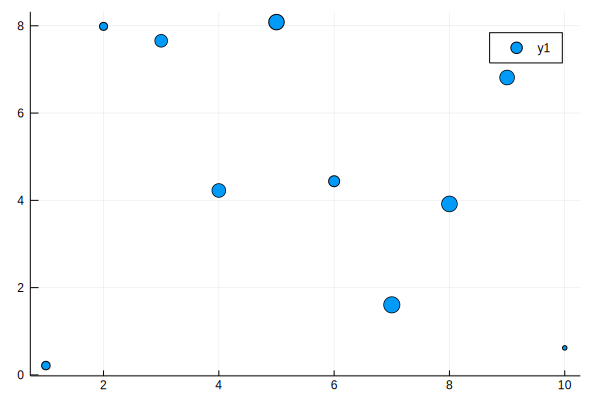

In [25]:
@df df scatter(:a, :b, markersize = 4 * log.(:c .+ 0.1))

* StatPlots provides some very nice recipes for dataframes and matrics
* we can look at correlational patterns in a dataframe or a matrix

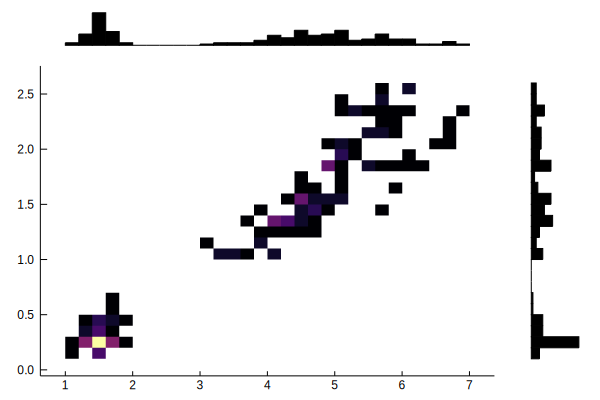

In [26]:
using RDatasets
iris = dataset("datasets","iris")
@df iris marginalhist(:PetalLength,:PetalWidth,bins=30)

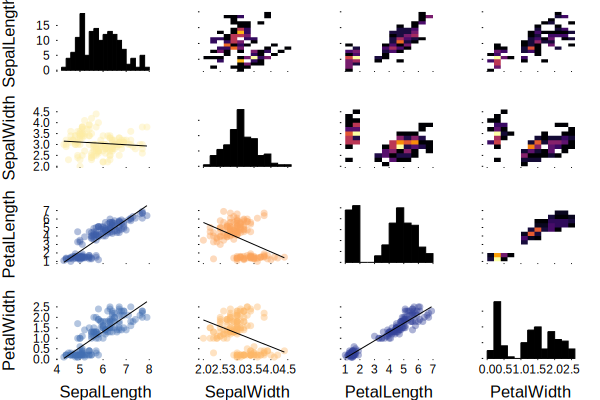

In [27]:
# correlation plot from a dataframe
@df iris corrplot([:SepalLength :SepalWidth :PetalLength :PetalWidth], grid = false, bins=20)

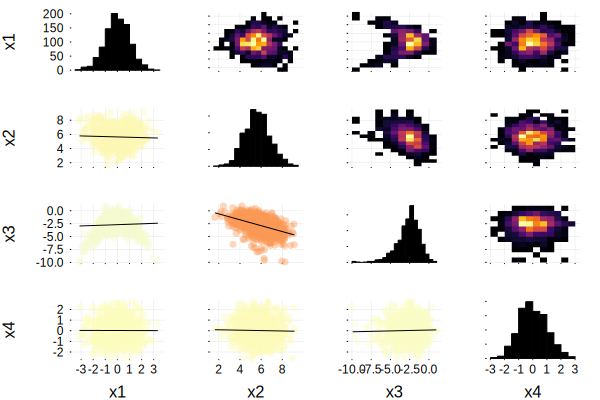

In [46]:
# corrplot from a matrix
M = randn(1000,4)
M[:,2] += 0.8sqrt.(abs.(M[:,1])) - 0.5M[:,3] .+ 5
M[:,3] -= 0.7M[:,1].^2 .+ 2
corrplot(M, label = ["x$i" for i=1:4])

In [29]:
# cornerplot for same matrix
cornerplot(M)

6×8 DataFrame
│ Row │ School       │ Minrty       │ Sx           │ SSS     │ MAch    │ MeanSES   │ Sector       │ CSES      │
│     │ Categorical… │ Categorical… │ Categorical… │ Float64 │ Float64 │ Float64   │ Categorical… │ Float64   │
├─────┼──────────────┼──────────────┼──────────────┼─────────┼─────────┼───────────┼──────────────┼───────────┤
│ 1   │ 1224         │ No           │ Female       │ -1.528  │ 5.876   │ -0.434383 │ Public       │ -1.09362  │
│ 2   │ 1224         │ No           │ Female       │ -0.588  │ 19.708  │ -0.434383 │ Public       │ -0.153617 │
│ 3   │ 1224         │ No           │ Male         │ -0.528  │ 20.349  │ -0.434383 │ Public       │ -0.093617 │
│ 4   │ 1224         │ No           │ Male         │ -0.668  │ 8.781   │ -0.434383 │ Public       │ -0.233617 │
│ 5   │ 1224         │ No           │ Male         │ -0.158  │ 17.898  │ -0.434383 │ Public       │ 0.276383  │
│ 6   │ 1224         │ No           │ Male         │ 0.022   │ 4.583   │ -0.434383 │ Publi

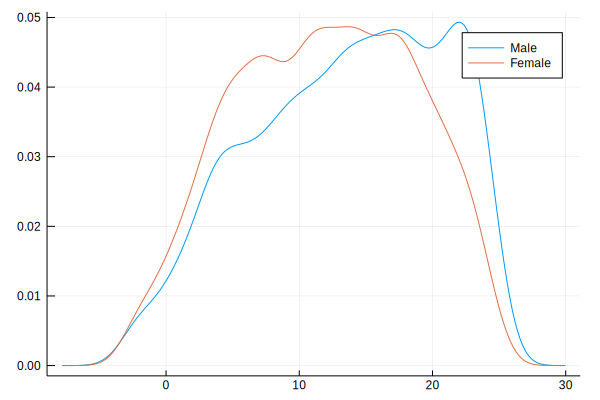

In [45]:
school = RDatasets.dataset("mlmRev","Hsb82")
println(first(school,6))
@df school density(:MAch, group = :Sx)

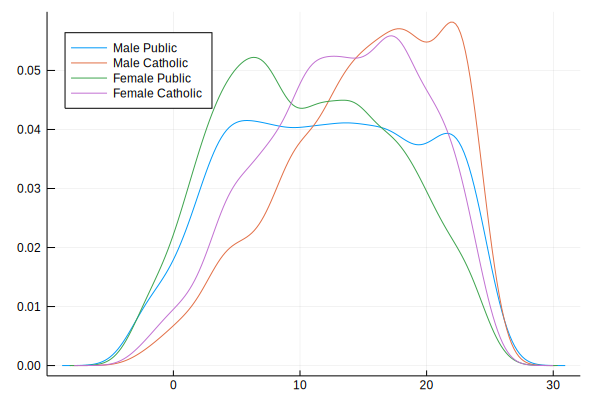

In [31]:
# use tuple of col names to group by more
@df school density(:MAch, group = (:Sx, :Sector), legend = :topleft)

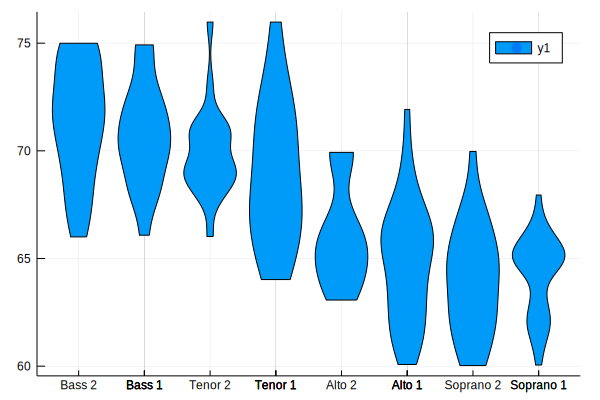

In [43]:
singers = RDatasets.dataset("lattice","singer")
@df singers violin(:VoicePart,:Height,marker=(0.2,:blue,stroke(0)))
# @df singers boxplot!(:VoicePart,:Height)

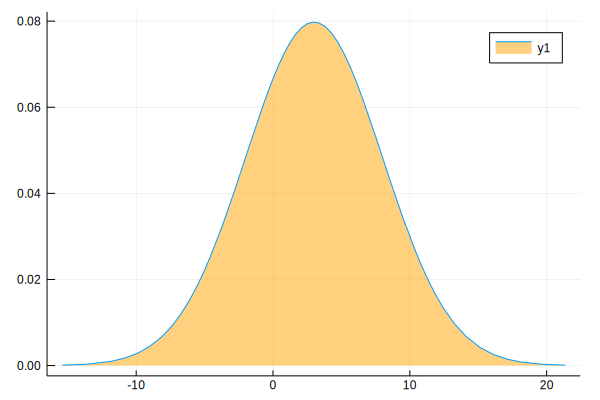

In [33]:
# there is great support to plot distributinos
using Distributions
plot(Normal(3,5), fill=(0, .5,:orange))

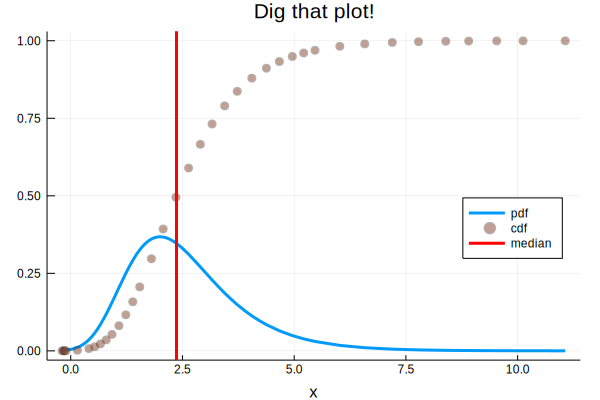

In [34]:
dist = Gumbel(2)
plot(dist,lw=3,label="pdf",legend=:right,title="Dig that plot!")
scatter!(dist,func=cdf,alpha=0.3,label="cdf",xlabel="x")
vline!([median(dist)],color=:red,lw=3,label="median")

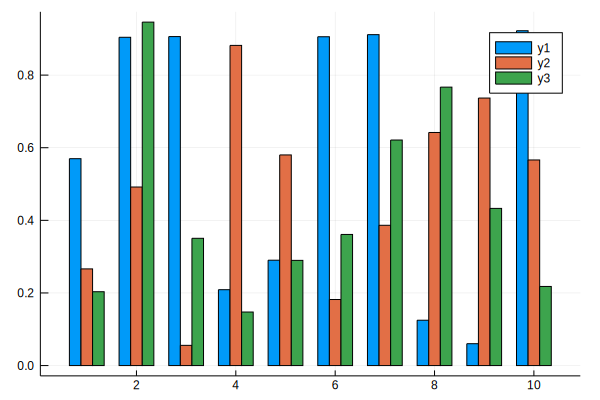

In [35]:
groupedbar(rand(10,3), bar_position = :dodge, bar_width=0.7)

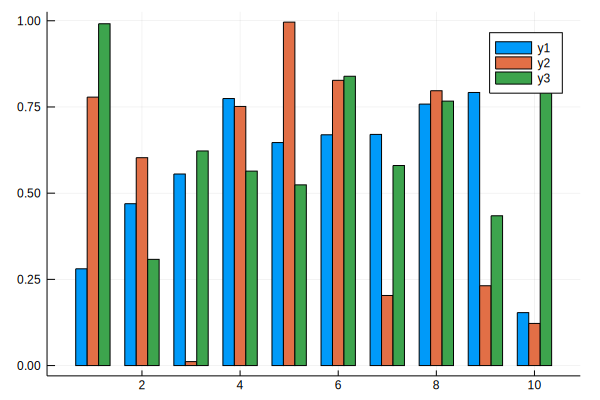

In [36]:
groupedbar(rand(10,3), bar_position = :dodge, bar_width=0.7)

### Plots and Query

* can combine a plot with a Query.jl pipeline
* very nice in terms of readability:

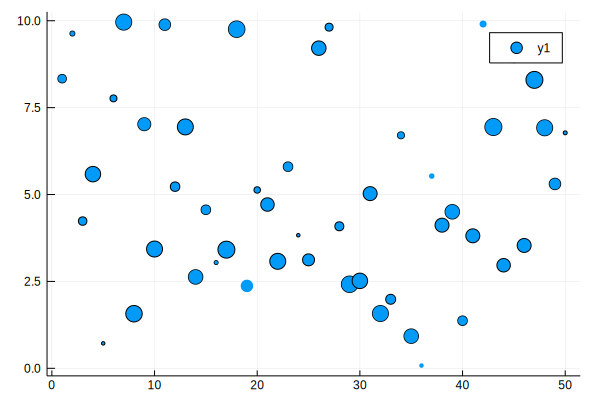

In [44]:
df = DataFrame(a = 1:50, b = 10*rand(50), c = 10 * rand(50))
@df df scatter(:a, :b, markersize = 4 * log.(:c .+ 0.1))  # like before

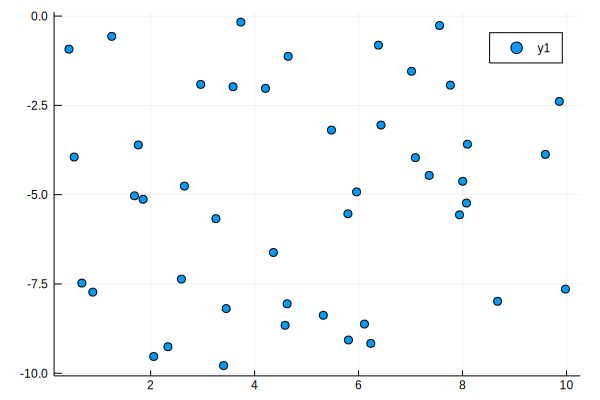

In [38]:
using Query
df |>
    @filter(_.a > 5) |>
    @map({_.b, d = _.c-10}) |>
    @df scatter(:b, :d)